In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Dennis/Downloads/Pydsci-master/Python_book/13Dimensionality_reduction/profile_telecom.csv')
df.head()

,ID,cnt_call,cnt_msg,cnt_wei,cnt_web
0,1964627,46,90,36,31
1,3107769,53,2,0,2
2,3686296,28,24,5,8
3,3961002,9,2,0,4
4,4174839,145,2,0,1


In [3]:
data = df.ix[:,'cnt_call':]
data.corr(method = 'pearson')

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,cnt_call,cnt_msg,cnt_wei,cnt_web
cnt_call,1.000000,0.052096,0.117832,0.114190
cnt_msg,0.052096,1.000000,0.510686,0.739506
cnt_wei,0.117832,0.510686,1.000000,0.950492
cnt_web,0.114190,0.739506,0.950492,1.000000


In [6]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
data_scaled = scale(data)
pca = PCA(n_components=2 , whiten=True).fit(data_scaled)
pca.explained_variance_ratio_

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.62510442, 0.24620209])

In [8]:
pca.components_
pca.transform(data_scaled)

array([[ 2.30183615, -0.89716788],
       [-0.74694076, -0.04035188],
       [-0.11502116, -0.59578592],
       ...,
       [ 2.19333782,  0.04953167],
       [-0.07833419, -0.10944885],
       [-0.6621524 ,  1.16641367]])

In [37]:
df = pd.read_csv('/Users/Dennis/Downloads/Pydsci-master/Python_book/13Dimensionality_reduction/cities_10.csv',encoding = 'gbk')
df

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7
5,上海,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0
6,浙江,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9
7,福建,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9
8,广东,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6
9,广西,2455.4,5062,367.0,995.7,542.2,352.7,1025.5,15.1,186.7


In [21]:
from sklearn.preprocessing import scale
scale_df = scale(df.ix[:,1:])
pca_c = PCA(n_components=3 , whiten=True).fit(scale_df)
pca_c.explained_variance_ratio_

/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


array([0.80112955, 0.12214932, 0.0607924 ])

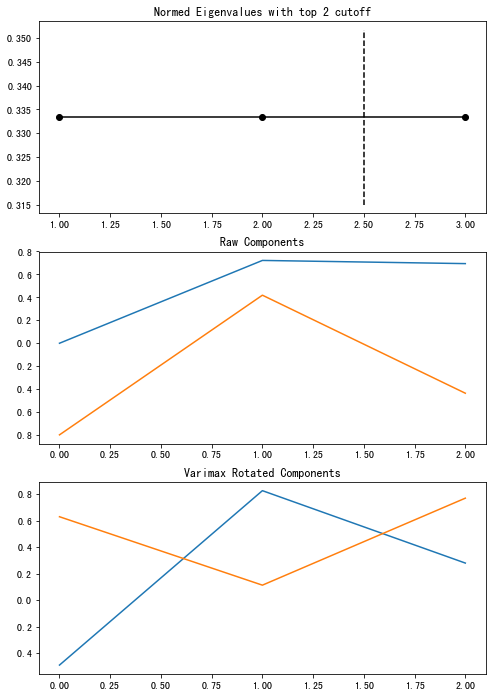

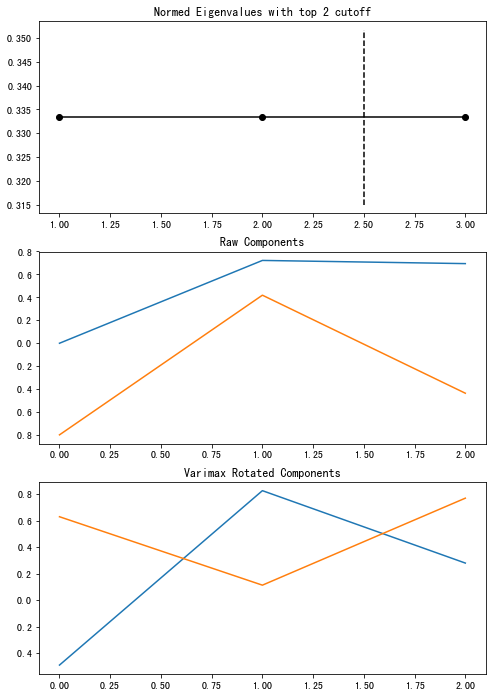

In [28]:
from fa_kit import FactorAnalysis
from fa_kit import plotting as f_plot
data = pca_c.transform(scale_df)
fa = FactorAnalysis.load_data_samples(data , preproc_demean = True , preproc_scale = True )
fa.extract_components()
fa.find_comps_to_retain(method='top_n' , num_keep = 2)
fa.rotate_components(method = 'varimax')
f_plot.graph_summary(fa)

In [29]:
pd.DataFrame(fa.comps['rot'])

,0,1
0,-0.489933,0.629109
1,0.825717,0.112886
2,0.279568,0.769076


/Users/Dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


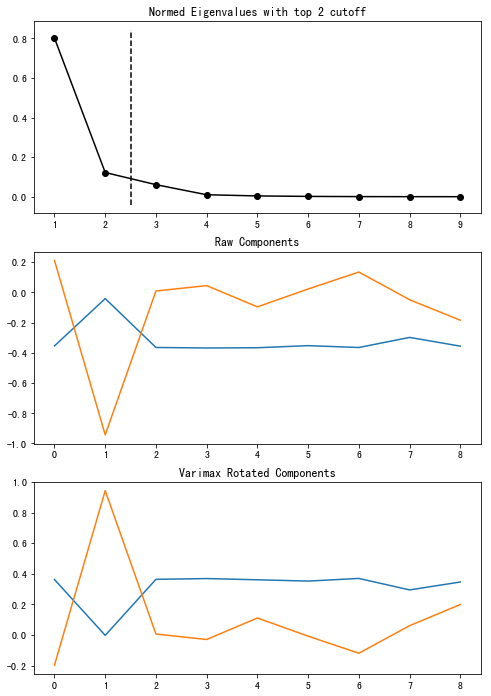

In [33]:
from fa_kit import FactorAnalysis
import fa_kit.plotting as fa_plotting
model_data = pd.read_csv('/Users/Dennis/Downloads/Pydsci-master/Python_book/13Dimensionality_reduction/cities_10.csv',encoding='gbk')
model_data.head()


# In[2]:
data = model_data.loc[ :,'X1':]
data.head()

# - 2、查看相关系数矩阵，判定做变量降维的必要性（非必须）

# In[3]:
corr_matrix = data.corr(method='pearson')

# - 3、做主成分之前，进行中心标准化

# In[4]:
from sklearn import preprocessing
data = preprocessing.scale(data)
# - 4、使用sklearn的主成分分析，用于判断保留主成分的数量

fa = FactorAnalysis.load_data_samples(
        data,
        preproc_demean=True,
        preproc_scale=True
        )
fa.extract_components()


# - 2、设定提取主成分的方式。默认为“broken_stick”方法，建议使用“top_n”法

# In[8]:
fa.find_comps_to_retain(method='top_n',num_keep=2)
# - 3、通过最大方差法进行因子旋转

# In[9]:
pd.DataFrame(fa.comps["rot"])#查看因子权重
fa.rotate_components(method='varimax')
fa_plotting.graph_summary(fa)
# - 说明：可以通过第三张图观看每个因子在每个变量上的权重，权重越高，代表性越强


# - 4、获取因子得分

# In[19]:
#到目前还没有与PCA中fit_transform类似的函数，因此只能手工计算因子
#以下是矩阵相乘的方式计算因子：因子=原始数据（n*k）*权重矩阵(k*num_keep)
import numpy as np
fas = pd.DataFrame(fa.comps["rot"])
data = pd.DataFrame(data)#注意data数据需要标准化
fa_score = pd.DataFrame(np.dot(data, fas))

# ### 第三步：根据因子得分进行数据分析

# In[25]:


a=fa_score.rename(columns={0: "Gross", 1: "Avg"})
citi10_fa=model_data.join(a)




In [36]:
fas = pd.DataFrame(fa.comps["rot"])
fas

,0,1
0,0.362880,-0.196047
1,-0.001947,0.943648
2,0.364222,0.006565
3,0.369255,-0.028775
4,0.361258,0.111596
5,0.352799,-0.007144
6,0.370140,-0.118691
7,0.295099,0.061400
8,0.346765,0.199650


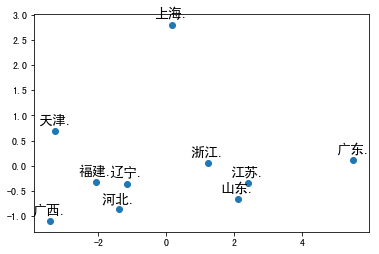

In [34]:
import matplotlib.pyplot as plt
x=citi10_fa['Gross']
y=citi10_fa['Avg']
label=citi10_fa['AREA']
plt.scatter(x, y)
for a,b,l in zip(x,y,label):
    plt.text(a, b+0.1, '%s.' % l, ha='center', va= 'bottom',fontsize=14)

plt.show()